In [34]:
%matplotlib inline
import numpy as np
import surprise
import time
import pandas as pd
from surprise import Reader, Dataset, SVD, evaluate
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from pylab import *
from scipy import stats
import matplotlib

In [19]:
class MatrixFacto(surprise.AlgoBase):
    '''A basic rating prediction algorithm based on matrix factorization.'''
    skip_train=0
    
    def __init__(self, learning_rate, n_epochs, n_factors):
        
        self.lr = learning_rate  # learning rate for SGD
        self.n_epochs = n_epochs  # number of iterations of SGD
        self.n_factors = n_factors  # number of factors
        
    def train(self, trainset):
        '''Learn the vectors p_u and q_i with SGD'''
        
        print('Fitting data with SGD...')
        
        # Randomly initialize the user and item factors.
        p = np.random.normal(0, .1, (trainset.n_users, self.n_factors))
        q = np.random.normal(0, .1, (trainset.n_items, self.n_factors))
        
        # SGD procedure
        for _ in range(self.n_epochs):
            for u, i, r_ui in trainset.all_ratings():
                err = r_ui - np.dot(p[u], q[i])
                # Update vectors p_u and q_i
                p[u] += self.lr * err * q[i]
                q[i] += self.lr * err * p[u]
                # Note: in the update of q_i, we should actually use the previous (non-updated) value of p_u.
                # In practice it makes almost no difference.
        
        self.p, self.q = p, q
        self.trainset = trainset

    def estimate(self, u, i):
        '''Return the estmimated rating of user u for item i.'''
        
        # return scalar product between p_u and q_i if user and item are known,
        # else return the average of all ratings
        if self.trainset.knows_user(u) and self.trainset.knows_item(i):
            return np.dot(self.p[u], self.q[i])
        else:
            return self.trainset.global_mean

In [40]:
data_size = [250, 500, 750, 1000]
time_MF = []
time_KNN = []
time_SVD = []
RMS_MF = []
RMS_KNN = []
RMS_SVD = []

In [21]:
ratings_dataFrame = pd.read_csv('ratings.csv', dtype={'rating': float})
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings_dataFrame[['user_id', 'book_id', 'rating']], reader)
data.split(2)

In [22]:
ratings_dataFrame.describe()

,user_id,book_id,rating
count,5.976479e+06,5.976479e+06,5.976479e+06
mean,2.622446e+04,2.006477e+03,3.919866e+00
std,1.541323e+04,2.468499e+03,9.910868e-01
min,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.281300e+04,1.980000e+02,3.000000e+00
50%,2.593800e+04,8.850000e+02,4.000000e+00
75%,3.950900e+04,2.973000e+03,5.000000e+00
max,5.342400e+04,1.000000e+04,5.000000e+00


In [41]:
def MatFac(dat):
    temp = time.time()
    algo = MatrixFacto(learning_rate=.01, n_epochs=10, n_factors=10)
    res = surprise.evaluate(algo, dat, measures=['RMSE'])
    time_MF.append(time.time() - temp)
    RMS_MF.append(np.mean(res['rmse']))

In [42]:
def s_KNN(dat):
    temp = time.time()
    algo = surprise.KNNBasic()
    res = surprise.evaluate(algo, dat, measures=['RMSE'])
    time_KNN.append(time.time() - temp)
    RMS_KNN.append(np.mean(res['rmse']))

In [43]:
def s_SVD(dat):
    temp = time.time()
    algo = surprise.SVD()
    res = surprise.evaluate(algo, dat, measures=['RMSE'])
    time_SVD.append(time.time() - temp)
    RMS_SVD.append(np.mean(res['rmse']))

In [44]:
def overWatch(data_df):
    reader = Reader(rating_scale=(1, 5))
    data = Dataset.load_from_df(data_df[['user_id', 'book_id', 'rating']], reader)
    data.split(2)
    MatFac(data)
    s_KNN(data)
    s_SVD(data)

In [45]:
overWatch(ratings_dataFrame[0:250000])

C:\Anaconda3\lib\site-packages\surprise\evaluate.py:66: UserWarning: The evaluate() method is deprecated. Please use model_selection.cross_validate() instead.
  'model_selection.cross_validate() instead.', UserWarning)
C:\Anaconda3\lib\site-packages\surprise\dataset.py:193: UserWarning: Using data.split() or using load_from_folds() without using a CV iterator is now deprecated. 
  UserWarning)


Evaluating RMSE of algorithm MatrixFacto.

------------
Fold 1
Fitting data with SGD...
RMSE: 1.0089
------------
Fold 2
Fitting data with SGD...
RMSE: 1.0051
------------
------------
Mean RMSE: 1.0070
------------
------------
Evaluating RMSE of algorithm KNNBasic.

------------
Fold 1
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9447
------------
Fold 2
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9399
------------
------------
Mean RMSE: 0.9423
------------
------------
Evaluating RMSE of algorithm SVD.

------------
Fold 1
RMSE: 0.8945
------------
Fold 2
RMSE: 0.8925
------------
------------
Mean RMSE: 0.8935
------------
------------


In [46]:
overWatch(ratings_dataFrame[0:500000])

C:\Anaconda3\lib\site-packages\surprise\evaluate.py:66: UserWarning: The evaluate() method is deprecated. Please use model_selection.cross_validate() instead.
  'model_selection.cross_validate() instead.', UserWarning)
C:\Anaconda3\lib\site-packages\surprise\dataset.py:193: UserWarning: Using data.split() or using load_from_folds() without using a CV iterator is now deprecated. 
  UserWarning)


Evaluating RMSE of algorithm MatrixFacto.

------------
Fold 1
Fitting data with SGD...
RMSE: 0.9586
------------
Fold 2
Fitting data with SGD...
RMSE: 0.9545
------------
------------
Mean RMSE: 0.9566
------------
------------
Evaluating RMSE of algorithm KNNBasic.

------------
Fold 1
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9354
------------
Fold 2
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9355
------------
------------
Mean RMSE: 0.9355
------------
------------
Evaluating RMSE of algorithm SVD.

------------
Fold 1
RMSE: 0.8966
------------
Fold 2
RMSE: 0.8972
------------
------------
Mean RMSE: 0.8969
------------
------------


In [49]:
overWatch(ratings_dataFrame[0:750000])

C:\Anaconda3\lib\site-packages\surprise\evaluate.py:66: UserWarning: The evaluate() method is deprecated. Please use model_selection.cross_validate() instead.
  'model_selection.cross_validate() instead.', UserWarning)
C:\Anaconda3\lib\site-packages\surprise\dataset.py:193: UserWarning: Using data.split() or using load_from_folds() without using a CV iterator is now deprecated. 
  UserWarning)


Evaluating RMSE of algorithm MatrixFacto.

------------
Fold 1
Fitting data with SGD...
RMSE: 0.9454
------------
Fold 2
Fitting data with SGD...
RMSE: 0.9421
------------
------------
Mean RMSE: 0.9438
------------
------------
Evaluating RMSE of algorithm KNNBasic.

------------
Fold 1
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9338
------------
Fold 2
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9348
------------
------------
Mean RMSE: 0.9343
------------
------------
Evaluating RMSE of algorithm SVD.

------------
Fold 1
RMSE: 0.8980
------------
Fold 2
RMSE: 0.8982
------------
------------
Mean RMSE: 0.8981
------------
------------


In [50]:
overWatch(ratings_dataFrame[0:1000000])

C:\Anaconda3\lib\site-packages\surprise\evaluate.py:66: UserWarning: The evaluate() method is deprecated. Please use model_selection.cross_validate() instead.
  'model_selection.cross_validate() instead.', UserWarning)
C:\Anaconda3\lib\site-packages\surprise\dataset.py:193: UserWarning: Using data.split() or using load_from_folds() without using a CV iterator is now deprecated. 
  UserWarning)


Evaluating RMSE of algorithm MatrixFacto.

------------
Fold 1
Fitting data with SGD...
RMSE: 0.9323
------------
Fold 2
Fitting data with SGD...
RMSE: 0.9368
------------
------------
Mean RMSE: 0.9346
------------
------------
Evaluating RMSE of algorithm KNNBasic.

------------
Fold 1
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9269
------------
Fold 2
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9261
------------
------------
Mean RMSE: 0.9265
------------
------------
Evaluating RMSE of algorithm SVD.

------------
Fold 1
RMSE: 0.8925
------------
Fold 2
RMSE: 0.8930
------------
------------
Mean RMSE: 0.8928
------------
------------


In [65]:
a_list = pd.DataFrame(
    {'dataSize1': data_size,
     'timeTakenMF': time_MF,
     'dataSize2': data_size,
     'timeTakenKNN': time_KNN,
     'dataSize3': data_size,
     'timeTakenSVD': time_SVD,
     'rmseMF': RMS_MF,
     'rmseKNN': RMS_KNN,
     'rmseSVD': RMS_SVD
    })
a_list

,dataSize1,dataSize2,dataSize3,rmseKNN,rmseMF,rmseSVD,timeTakenKNN,timeTakenMF,timeTakenSVD
0,250,250,250,0.942305,1.007031,0.893502,73.358741,42.523040,34.752903
1,500,500,500,0.935454,0.956564,0.896882,217.833789,85.199796,66.114954
2,750,750,750,0.934269,0.943793,0.898105,452.065259,128.425195,104.222106
3,1000,1000,1000,0.926498,0.934552,0.892756,824.356540,202.471418,138.622456


In [68]:
import matplotlib.lines as mlines

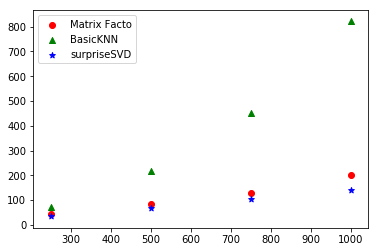

In [77]:
'''
color1 = cm.rainbow(((1*8)+6)**2)
sct1 = scatter(a_list['dataSize1'], a_list['timeTakenMF'], c=color1, s=100, linewidths=2, label = "Matrix Facto")
color2 = cm.rainbow(((0*8)+6)**2)
sct2 = scatter(a_list['dataSize2'], a_list['timeTakenKNN'], c=color2, s=100, linewidths=2, label = "BasicKNN")
color3 = cm.rainbow(((5*8)+6)**2)
sct3 = scatter(a_list['dataSize3'], a_list['timeTakenSVD'], c=color3, s=100, linewidths=2, label = "surpriseSVD")

sct1.set_alpha(0.75)
sct2.set_alpha(0.75)
sct3.set_alpha(0.75)

title("Data-size vs Time Taken (Algorithm)")
xlabel('Data-size')
ylabel('Time-Taken')
legend()
show()
'''
#mf = mlines.Line2D(a_list['dataSize1'], a_list['timeTakenMF'], color='blue', marker='*', linestyle='None', markersize=10, label='Matrix Facto')
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
'''
ax.plot(a_list['dataSize1'], a_list['timeTakenMF'], color='red', ls="-", label= "Matrix Facto")
ax.plot(a_list['dataSize2'], a_list['timeTakenKNN'], color='green', ls="--", label="BasicKNN")
ax.plot(a_list['dataSize3'], a_list['timeTakenSVD'], color='blue', ls=":", label="surpriseSVD")
'''
ax.scatter(a_list['dataSize1'], a_list['timeTakenMF'], color='red', marker='o', label= "Matrix Facto")
ax.scatter(a_list['dataSize2'], a_list['timeTakenKNN'], color='green', marker='^', label="BasicKNN")
ax.scatter(a_list['dataSize3'], a_list['timeTakenSVD'], color='blue', marker='*', label="surpriseSVD")

ax.legend()
plt.show()

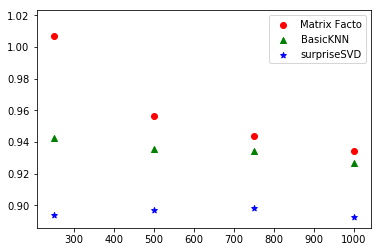

In [78]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.scatter(a_list['dataSize1'], a_list['rmseMF'], color='red', marker='o', label= "Matrix Facto")
ax.scatter(a_list['dataSize2'], a_list['rmseKNN'], color='green', marker='^', label="BasicKNN")
ax.scatter(a_list['dataSize3'], a_list['rmseSVD'], color='blue', marker='*', label="surpriseSVD")

ax.legend()
plt.show()